### Importing Libraries
#### if wordcloud doesn't get installed then run this:
### 'conda install -c https://conda.anaconda.org/conda-forge wordcloud'
#### wordcloud generates words of different sizes

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud



%matplotlib inline

## Reading the file 'SpamHam.csv'

In [3]:
sms = pd.read_csv('SpamHam.csv',encoding='ISO-8859-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


##  Deleting unwanted columns and renaming the columns that are to be used

In [4]:
cols_to_drop = ['Unnamed: 2','Unnamed: 3','Unnamed: 4']
sms.drop(cols_to_drop,axis=1,inplace=True)
sms.columns = ['label','message']
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
sms.isnull().sum()

label      0
message    0
dtype: int64

## Preprocessing data and Splitting data into train/test

In [7]:
cv = CountVectorizer(decode_error='ignore')

#CountVectorizer tokenizes(tokenization means breaking down a sentence or paragraph or any text into words) 
#the text along with performing very basic preprocessing like removing the punctuation marks, converting all 
#the words to lowercase, etc

X = cv.fit_transform(sms['message'])

X_train, X_test, y_train, y_test = train_test_split(X, sms['label'], test_size=0.3, random_state=101)

In [8]:
sms['message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [9]:
mnb = MultinomialNB() 
# It calculates each tag's likelihood for a given sample and outputs the tag with the greatest chance
# popularly used for NLP

mnb.fit(X_train,y_train)
print('training accuracy is --> ',mnb.score(X_train,y_train)*100)
print('test accuracy is --> ',mnb.score(X_test,y_test)*100)


training accuracy is -->  99.41025641025641
test accuracy is -->  98.56459330143541


In [10]:
def visualize(label):
    words = ''
    for msg in sms[sms['label']==label]['message']:   # looks for 'spam' and 'ham' seperately
        msg = msg.lower()                             # lowercase words
        words+=msg + ' '                              # Adds sms's 'spam' and 'ham' msg seperately
    wordcloud = WordCloud(width=400,height=400).generate(words)      # prepared for generating cloud of words
    plt.imshow(wordcloud)
    plt.axis('off')

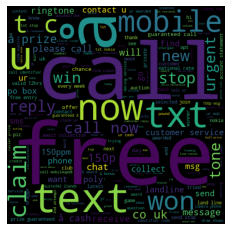

In [11]:
visualize('spam')

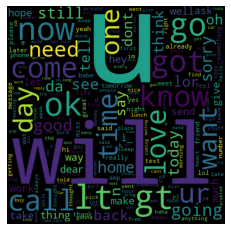

In [12]:
visualize('ham')

### Predictor 

In [13]:
# just type in your message and run
your_message = 'You are one heck of a winner.'
your_message = cv.transform([your_message])
claass = mnb.predict(your_message)
print(f'This is a {claass[0]} message')

This is a ham message
